In [52]:
import numpy as np
import pickle
import csv
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

Declaring Directories

In [3]:
train_im_dir = "../../data/train/images/"
train_data_dir = "../../data/train/train.csv"
mask_path = "../../data/train/masks/"
w = 101
h = 101
files = [f for f in listdir(train_im_dir) if isfile(join(train_im_dir, f))]

Reading in images in X

In [49]:
# list of all pictures
X = np.ndarray(shape = (0, 101, 101, 1))
one_hot = np.zeros(shape = (0, 2))
print(one_hot)

# looping through all pictures
for i in range (len (files)):
    # open image and mask
    raw_im = Image.open(train_im_dir+files[i])
    mask = Image.open(mask_path+files[i])
                      
    # getting not_salt image
    not_salt = raw_im.copy()
    not_salt.paste(mask, (0,0), mask.convert('L'))
    
    # inverting mask
    invert_mask = ImageOps.invert(mask.convert("RGB"))
    
    # getting salt
    salt = raw_im.copy()
    salt.paste(invert_mask, (0, 0), invert_mask.convert('L'))
                      

    if (len(salt.getcolors()) > 1):   
        salt = salt.convert('L')
        pixels = np.array(list(salt.getdata()))
        pixels = pixels.reshape((1, 101, 101, 1))
        X = np.concatenate((X, pixels), axis = 0)
        one_hot = np.concatenate((one_hot, np.array([[1, 0]])), axis = 0)
    
    if (len(not_salt.getcolors()) > 1):
        not_salt = not_salt.convert('L')
        pixels = np.array(list(not_salt.getdata()))
        pixels = pixels.reshape((1, 101, 101, 1))
        X = np.concatenate((X, pixels), axis = 0)
        one_hot = np.concatenate((one_hot, np.array([[0, 1]])), axis = 0)
                    
    if (i%100 == 0):
        print (str(i) + " / " + str(len(files)*2))
print(X.shape)
print(y.shape)

[]
0 / 8000
100 / 8000
200 / 8000
300 / 8000
400 / 8000
500 / 8000
600 / 8000
700 / 8000
800 / 8000
900 / 8000
1000 / 8000
1100 / 8000
1200 / 8000
1300 / 8000
1400 / 8000
1500 / 8000
1600 / 8000
1700 / 8000
1800 / 8000
1900 / 8000
2000 / 8000
2100 / 8000
2200 / 8000
2300 / 8000
2400 / 8000
2500 / 8000
2600 / 8000
2700 / 8000
2800 / 8000
2900 / 8000
3000 / 8000
3100 / 8000
3200 / 8000
3300 / 8000
3400 / 8000
3500 / 8000
3600 / 8000
3700 / 8000
3800 / 8000
3900 / 8000
(6358, 101, 101, 1)


NameError: name 'y' is not defined

In [50]:
data = [X, one_hot]
pickle.dump(data, open("training_separated.p", 'wb') )

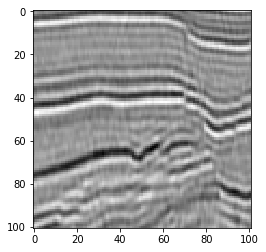

In [57]:
plt.imshow(X[3].reshape(101, 101), cmap = "gray")